In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.axes as ax

In [2]:
data = pd.read_csv("data_for_lr.csv")

In [3]:
data.head(10)

x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
5  36.0  32.463875
6  12.0  10.780897
7  81.0  80.763399
8  25.0  24.612151
9   5.0   6.963319

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data = data.dropna()

In [7]:
print("Shape of dataset = {}". format(data.shape))

Shape of dataset = (699, 2)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [11]:
# training dataset and labels

train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

# valid dataset and labels

# print the stapes
print("train input shape = {}". format(train_input.shape))
print("train output shape = {}". format(train_output.shape))
print("test input shape = {}". format(test_input.shape))
print("test output shape = {}". format(test_output.shape))


train input shape = (500, 1)
train output shape = (500, 1)
test input shape = (199, 1)
test output shape = (199, 1)


C:\Users\Piyush\AppData\Local\Temp\ipykernel_13284\3369024708.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_input = np.array(data.x[0:500]).reshape(500,1)
C:\Users\Piyush\AppData\Local\Temp\ipykernel_13284\3369024708.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_output = np.array(data.y[0:500]).reshape(500,1)
C:\Users\Piyush\AppData\Local\Temp\ipykernel_13284\3369024708.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is depre

In [13]:
# Linear regression 

# Forward propogation

In [30]:
def forward_propogation(train_input , parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m , train_input) + c
    
    return predictions

In [36]:
# Cost function

def cost_function(predictions , train_output):
    cost = np.mean((predictions - train_output)**2)*0.5
    return cost

In [ ]:
# Gradient descent Or Back propogation



In [37]:
def backward_propogation(train_input , train_output , predictions):
    derivatives = dict()
    df = (predictions - train_output)
    
    dm = np.mean(np.multiply(df , train_input))
    dc = np.mean(df)
    
    derivatives ['dm'] = dm
    derivatives['dc'] = dc
    return derivatives
    

In [19]:
# Update parameters

In [38]:
def update_parameters(parameters , derivatives , learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    
    return parameters

In [21]:
# Training

In [46]:
def train(train_input , train_output , learning_rate , iters):
    parameters = dict()
    parameters['m'] = .1
    parameters['c'] = np.random.uniform(0,1)
    loss = list()
    plt.figure()
    for i in range(iters):
        predictions = forward_propogation(train_input , parameters)
        
        cost = cost_function(predictions , train_output)
        loss.append(cost)
        print("Iteration = {} , loss = {}".format(i+1,cost) )
        
        fig , ax = plt.subplots()
        
        ax.plot(train_input , train_output , '+' , label = 'original_result')
        ax.plot(train_input , predictions , label = 'training_result')
        
        plt.plot(train_input , train_output,'+')
        plt.plot(train_input , predictions , '*')
        
        derivatives = backward_propogation(train_input , train_output , predictions)
        
        parameters = update_parameters(parameters , derivatives , learning_rate)
        
    return parameters, loss

Iteration = 1 , loss = 1317.4048972190687
Iteration = 2 , loss = 599.849123409433
Iteration = 3 , loss = 274.29327379400564
Iteration = 4 , loss = 126.58822398077515
Iteration = 5 , loss = 59.57427903268942
Iteration = 6 , loss = 29.169977738725393
Iteration = 7 , loss = 15.37551232099891
Iteration = 8 , loss = 9.116947838072399
Iteration = 9 , loss = 6.277429956351365
Iteration = 10 , loss = 4.989137304686484
Iteration = 11 , loss = 4.404637258111328
Iteration = 12 , loss = 4.139448696027343
Iteration = 13 , loss = 4.019132108151832
Iteration = 14 , loss = 3.9645440954531446
Iteration = 15 , loss = 3.9397772101281263
Iteration = 16 , loss = 3.9285402033359187
Iteration = 17 , loss = 3.9234417174325613
Iteration = 18 , loss = 3.9211282852680203
Iteration = 19 , loss = 3.920078435081884
Iteration = 20 , loss = 3.9196018734512075


C:\Users\Piyush\AppData\Local\Temp\ipykernel_13284\3327589547.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig , ax = plt.subplots()


Iteration = 21 , loss = 3.9193854134854056
Iteration = 22 , loss = 3.9192869619453177
Iteration = 23 , loss = 3.91924205097095
Iteration = 24 , loss = 3.919221431422814
Iteration = 25 , loss = 3.9192118329339247
Iteration = 26 , loss = 3.9192072347240847
Iteration = 27 , loss = 3.9192049051586446
Iteration = 28 , loss = 3.919203604891942
Iteration = 29 , loss = 3.9192027716314732
Iteration = 30 , loss = 3.9192021502645074
Iteration = 31 , loss = 3.9192016250461164
Iteration = 32 , loss = 3.9192011434626965
Iteration = 33 , loss = 3.919200681688764
Iteration = 34 , loss = 3.919200228914675
Iteration = 35 , loss = 3.9191997802360787
Iteration = 36 , loss = 3.919199333427865
Iteration = 37 , loss = 3.919198887480499
Iteration = 38 , loss = 3.919198441935953
Iteration = 39 , loss = 3.9191979965864183
Iteration = 40 , loss = 3.919197551337613
Iteration = 41 , loss = 3.9191971061467576
Iteration = 42 , loss = 3.919196660994444
Iteration = 43 , loss = 3.919196215871867
Iteration = 44 , loss =

<Figure size 640x480 with 0 Axes>

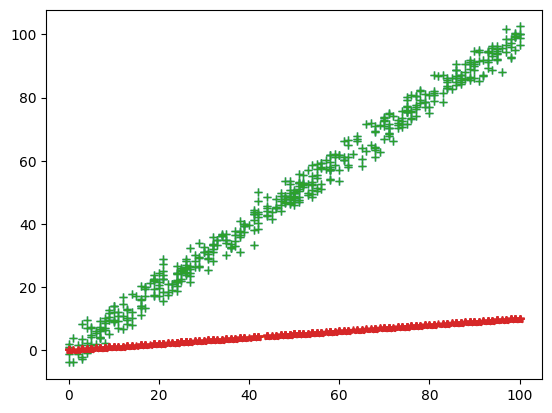

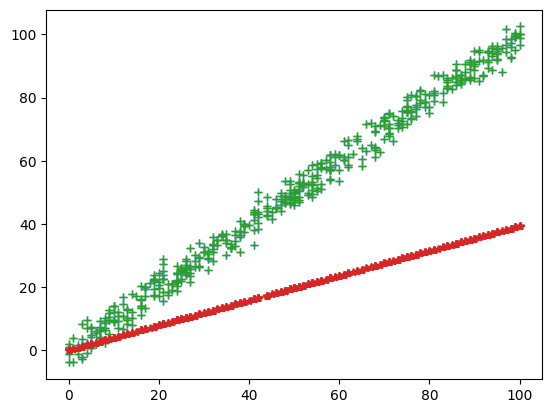

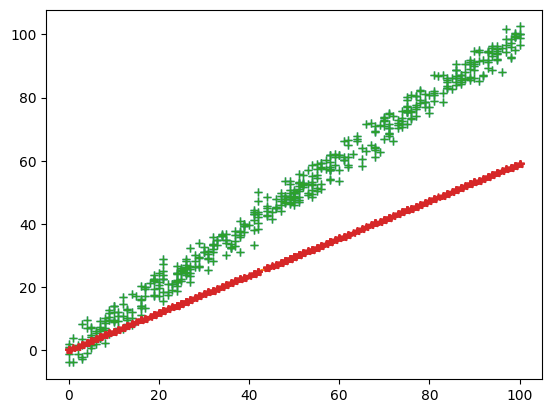

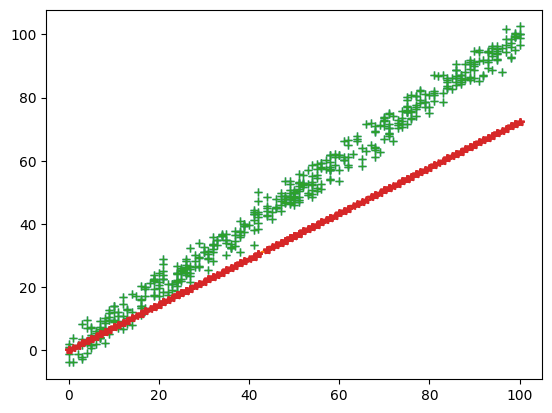

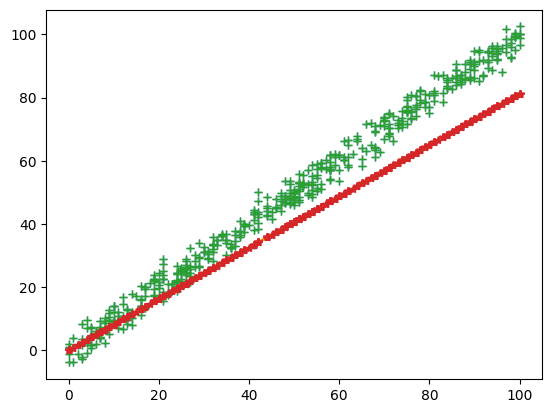

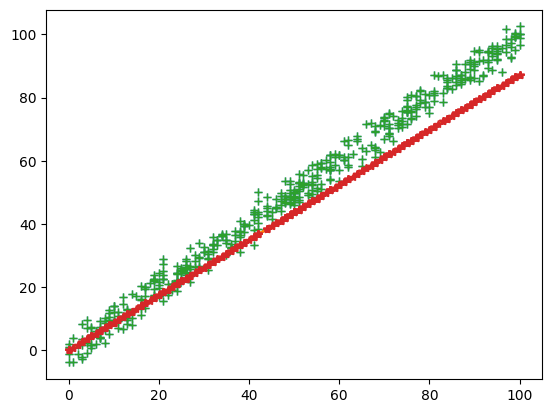

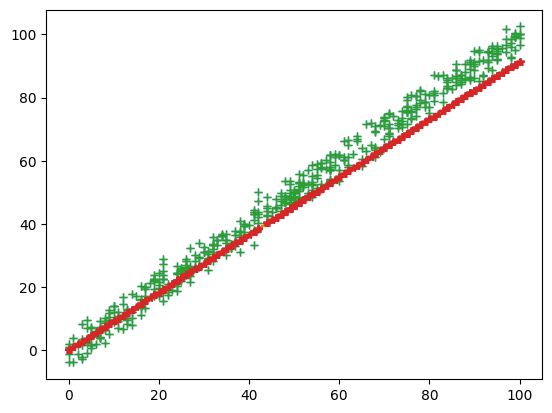

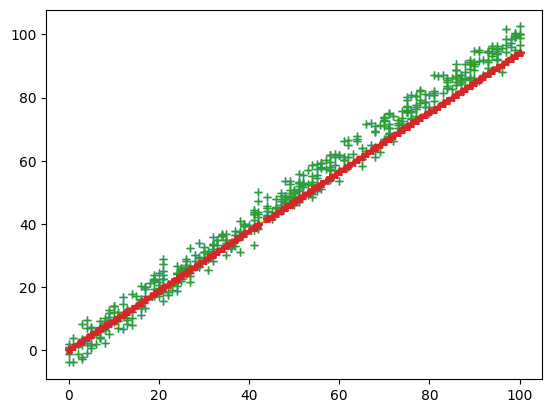

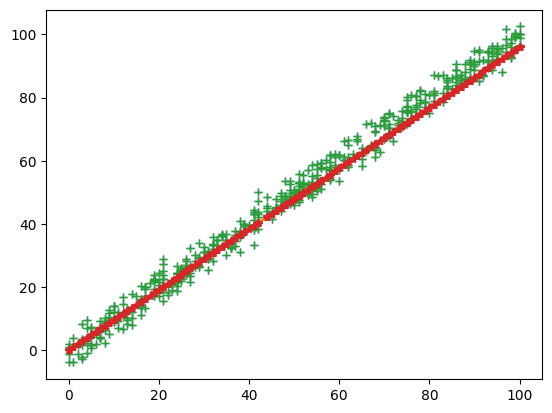

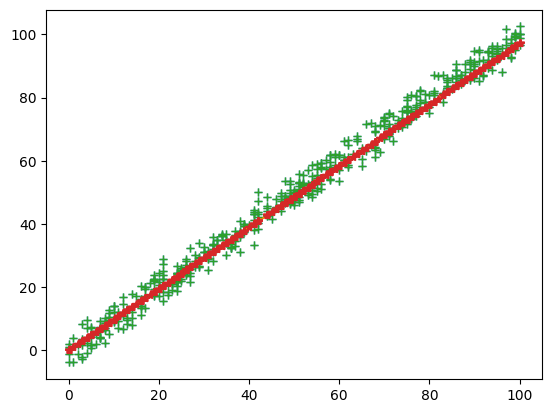

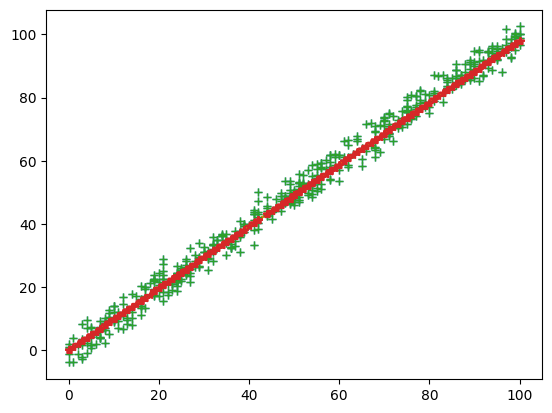

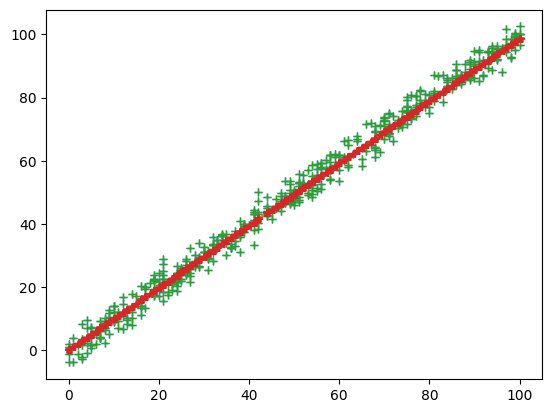

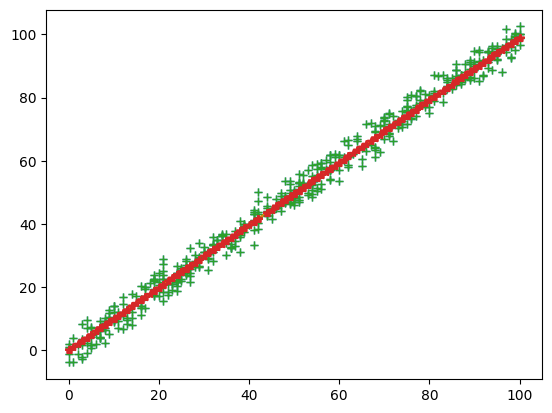

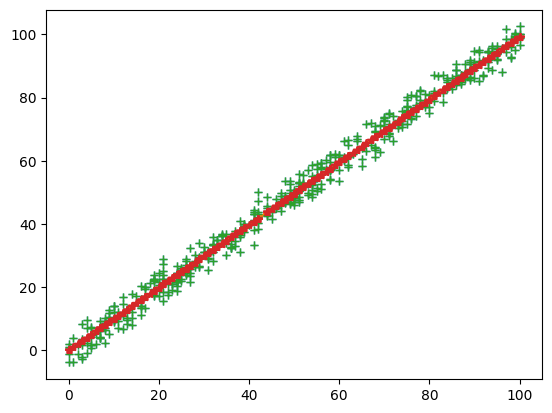

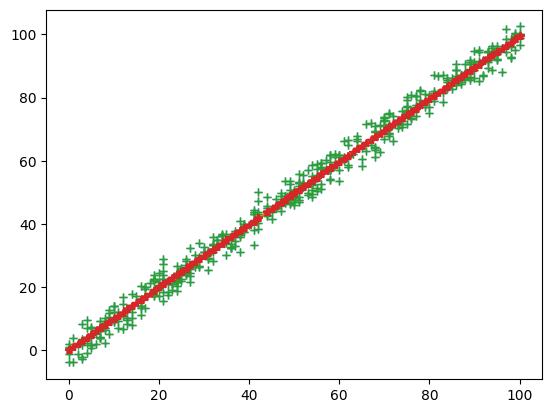

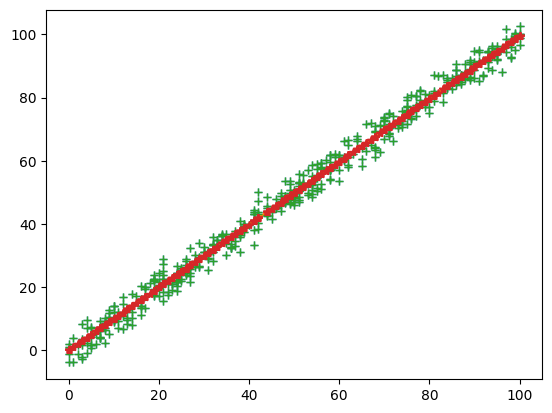

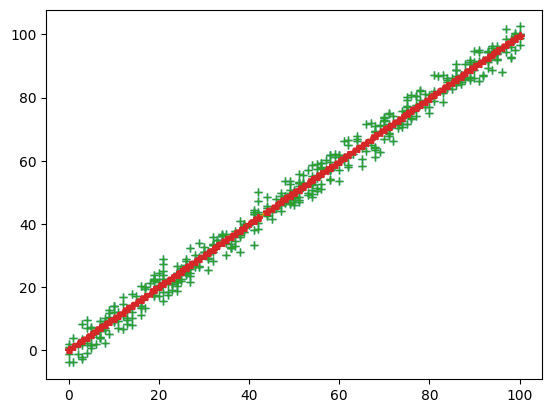

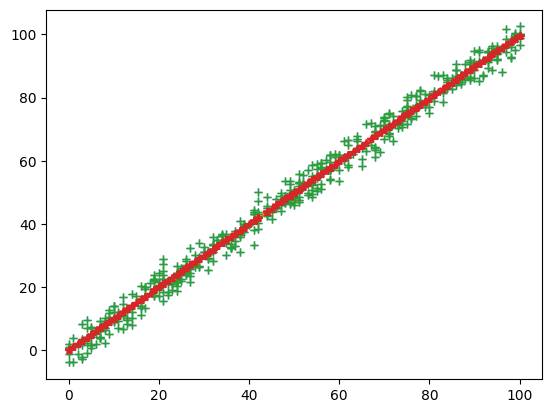

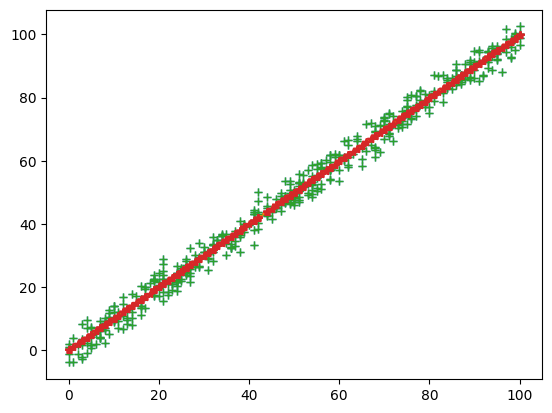

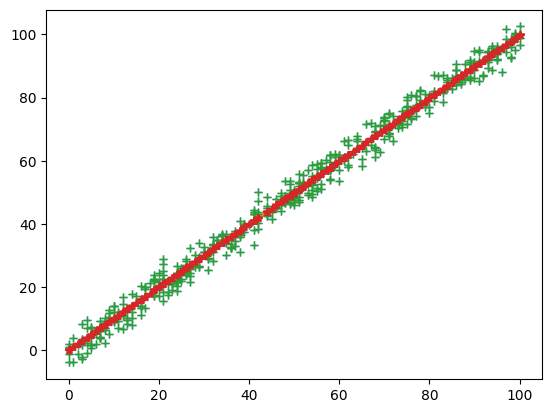

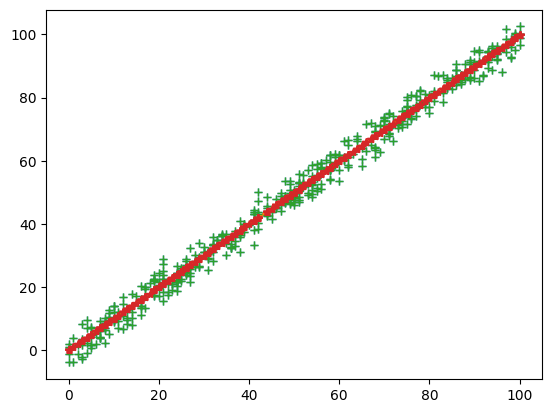

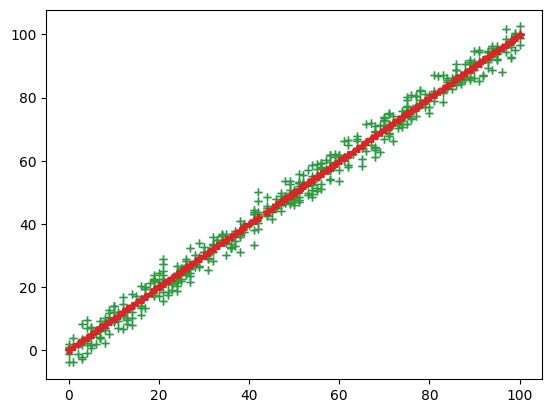

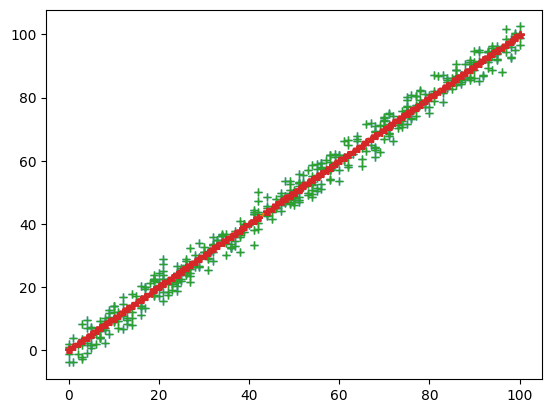

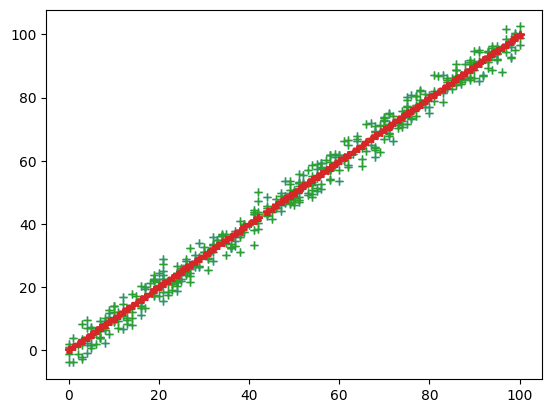

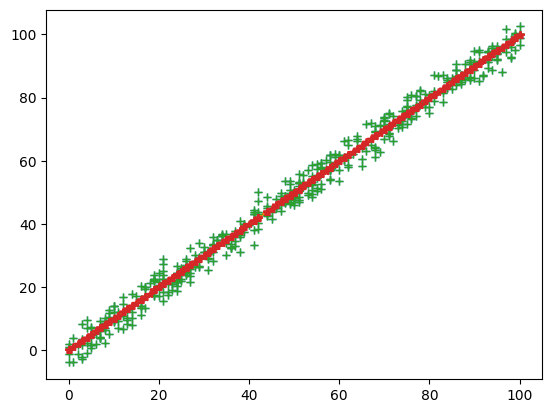

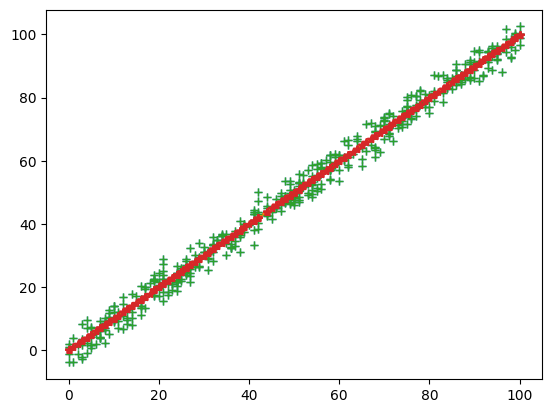

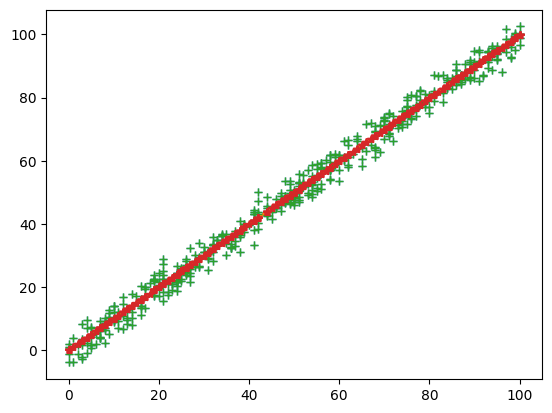

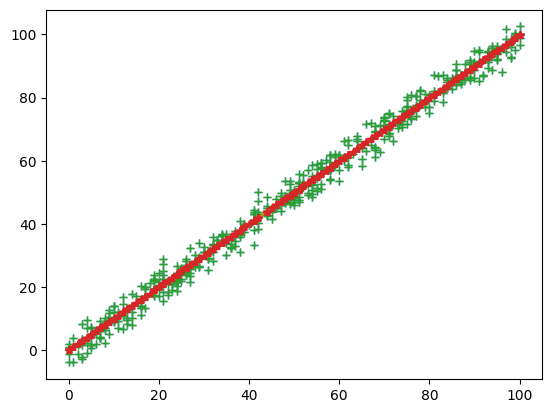

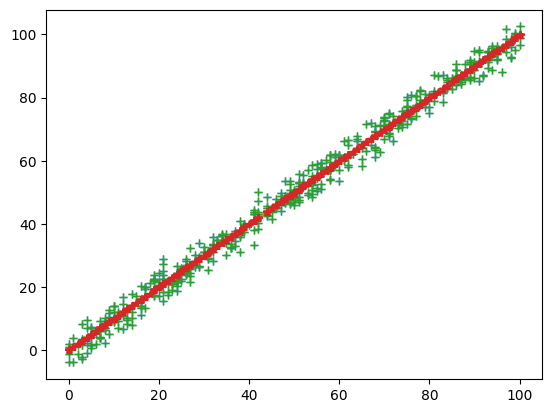

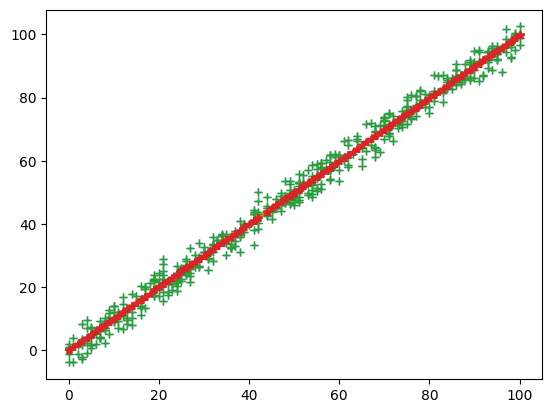

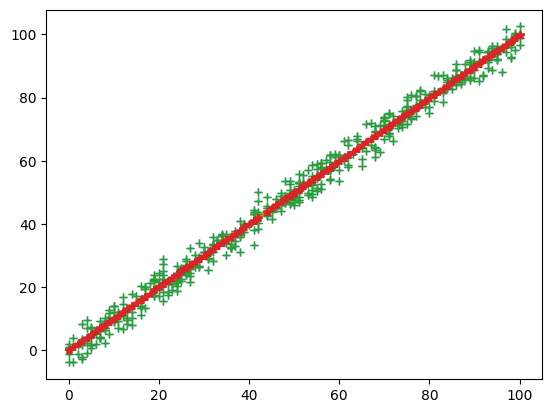

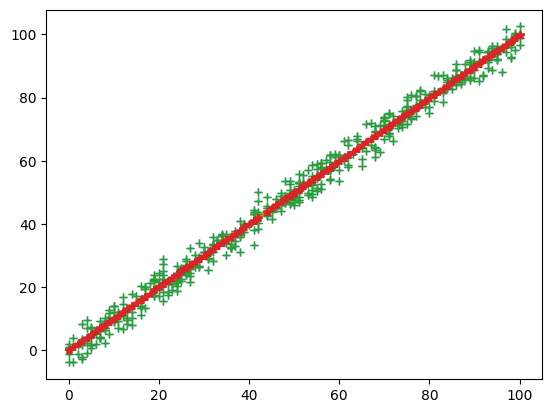

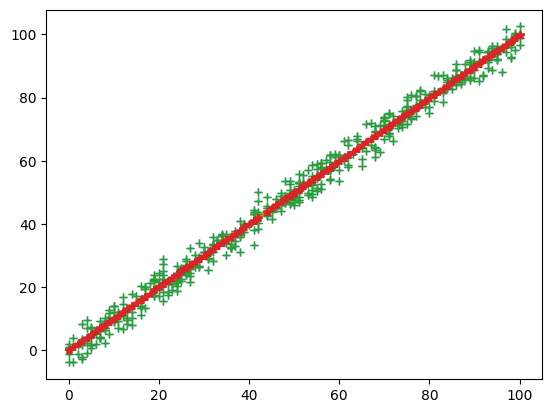

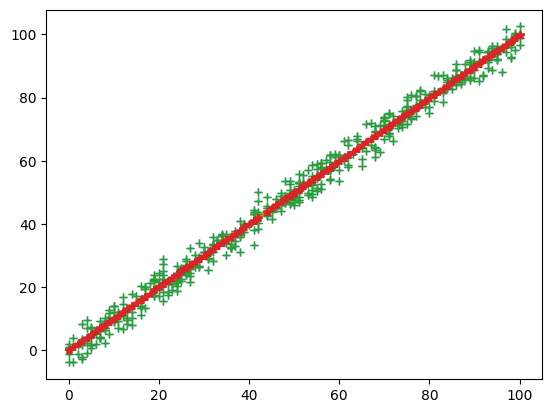

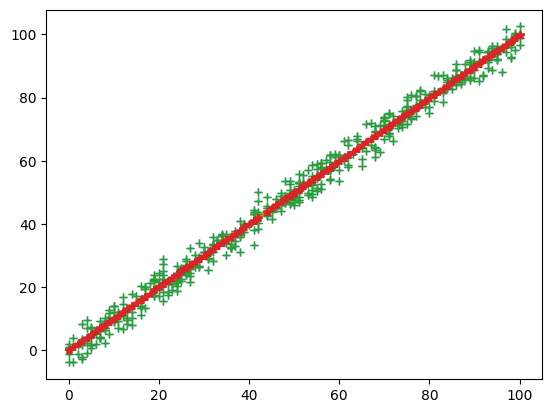

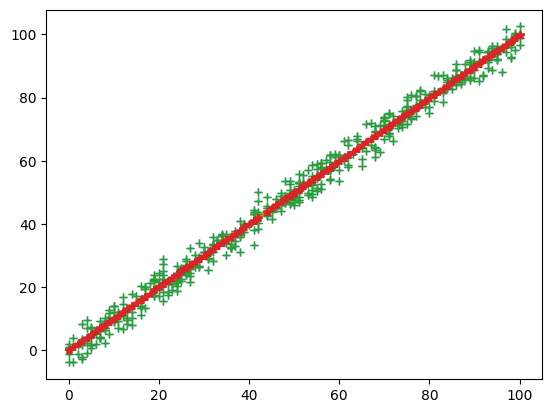

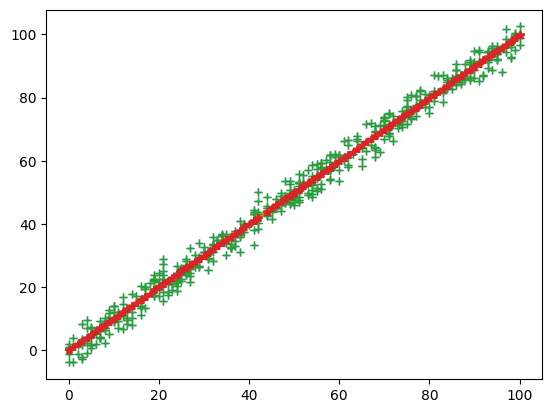

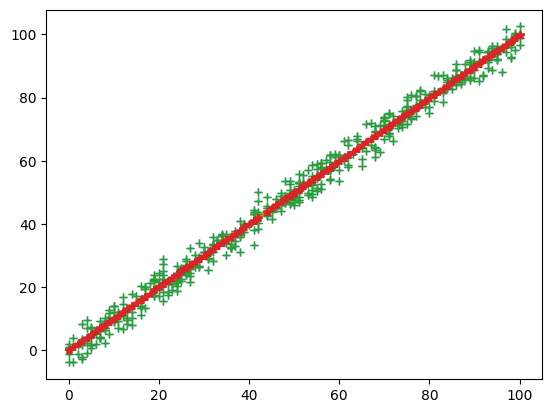

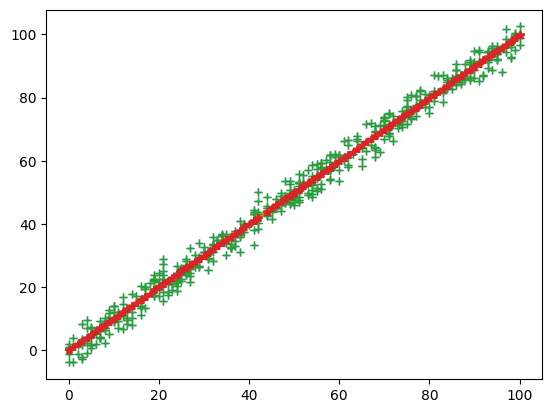

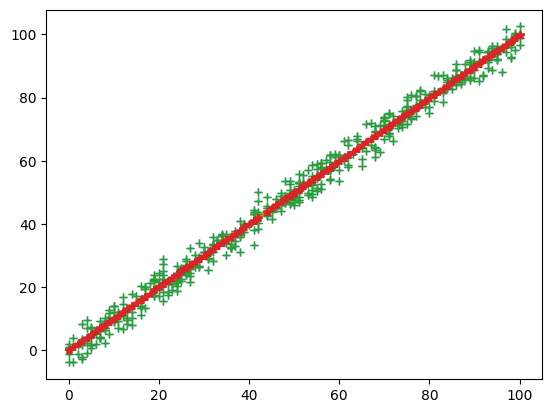

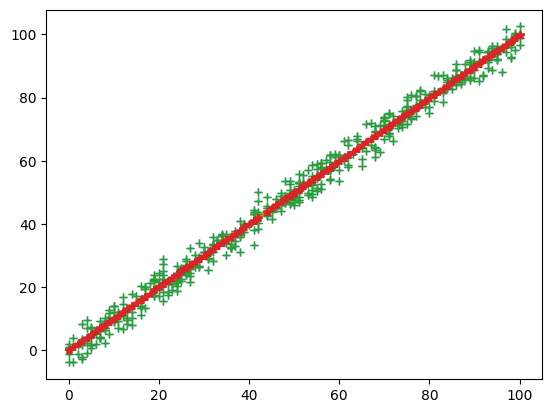

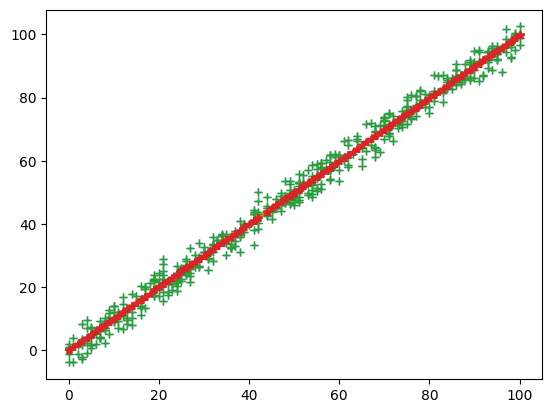

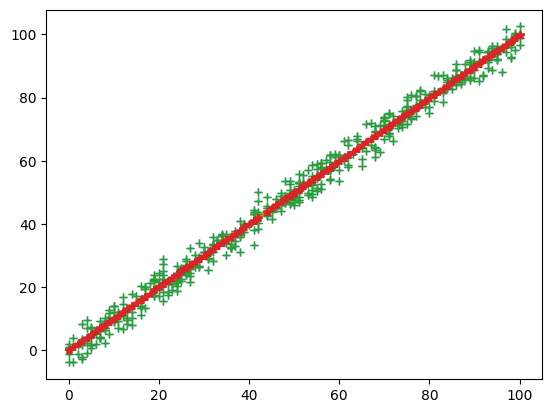

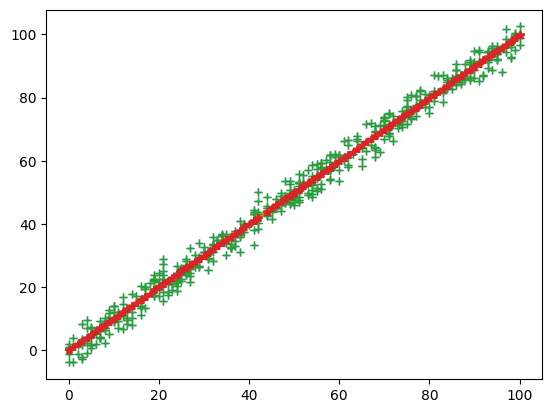

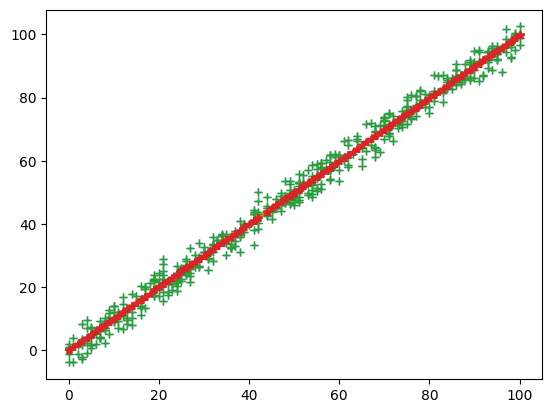

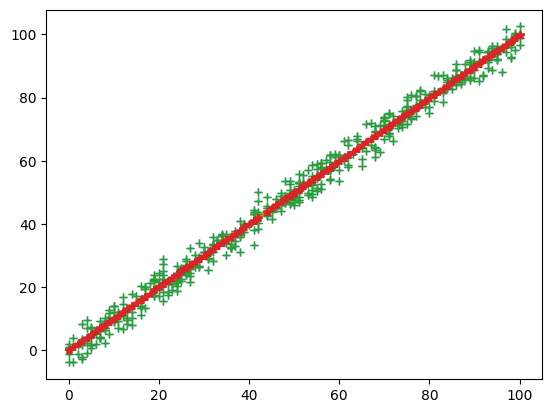

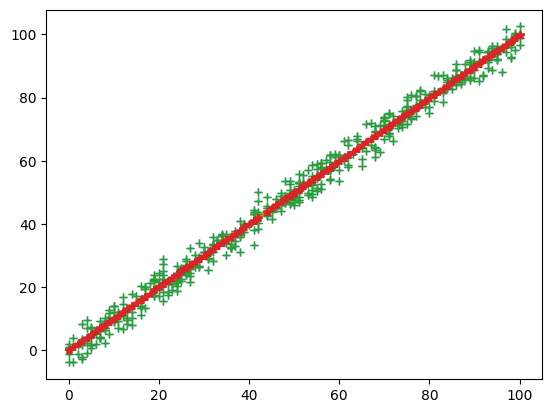

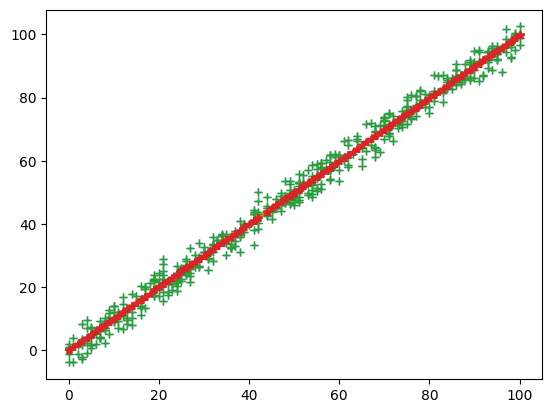

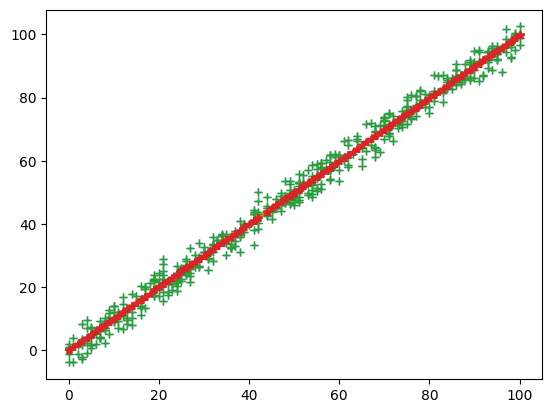

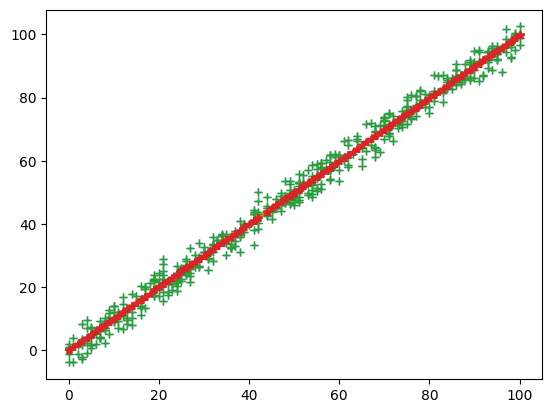

In [53]:
parameters , loss = train(train_input , train_output , 0.0001 , 50)

In [54]:
parameters

{'m': 0.9969899104138483, 'c': 0.028763777300466264}

In [58]:
# Predictions 


test_predictions = test_input*parameters['m'] + parameters['c'] 

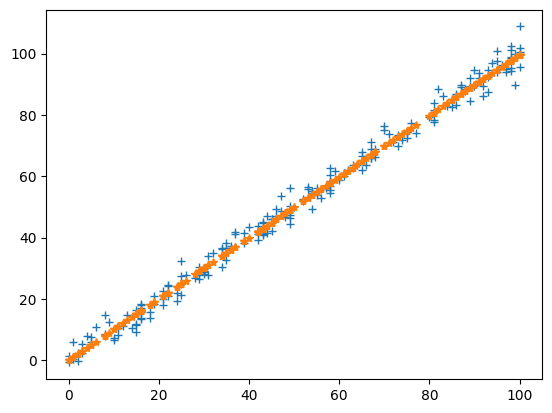

In [61]:
plt.figure()
plt.plot(test_input , test_output,'+')
plt.plot(test_input , test_predictions , '*')
plt.show()

In [62]:
cost_function(test_predictions , test_output)

3.994472477690721

Iteration = 1 , loss = 1306.872684857374
Iteration = 2 , loss = 1223.1987837606553
Iteration = 3 , loss = 1144.8984021125289
Iteration = 4 , loss = 1071.6264536801143
Iteration = 5 , loss = 1003.0600135922342
Iteration = 6 , loss = 938.8968951416589
Iteration = 7 , loss = 878.8543179847941
Iteration = 8 , loss = 822.6676618692928
Iteration = 9 , loss = 770.0893003970041
Iteration = 10 , loss = 720.8875096824064
Iteration = 11 , loss = 674.8454470967583
Iteration = 12 , loss = 631.7601955970711
Iteration = 13 , loss = 591.4418694280674
Iteration = 14 , loss = 553.7127772557596
Iteration = 15 , loss = 518.4066390444067
Iteration = 16 , loss = 485.3678532254592
Iteration = 17 , loss = 454.45081092875427
Iteration = 18 , loss = 425.51925425363004
Iteration = 19 , loss = 398.4456757517287
Iteration = 20 , loss = 373.11075647488116
Iteration = 21 , loss = 349.4028401114321
Iteration = 22 , loss = 327.2174408934147
Iteration = 23 , loss = 306.45678310581735


C:\Users\Piyush\AppData\Local\Temp\ipykernel_13284\3327589547.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig , ax = plt.subplots()


Iteration = 24 , loss = 287.02937016846465
Iteration = 25 , loss = 268.84958139136364
Iteration = 26 , loss = 251.83729462633352
Iteration = 27 , loss = 235.9175331518641
Iteration = 28 , loss = 221.020135234951
Iteration = 29 , loss = 207.07944491359603
Iteration = 30 , loss = 194.0340226371886
Iteration = 31 , loss = 181.8263744894966
Iteration = 32 , loss = 170.40269880089735
Iteration = 33 , loss = 159.71264903311572
Iteration = 34 , loss = 149.70911189145153
Iteration = 35 , loss = 140.34799968659084
Iteration = 36 , loss = 131.58805603089598
Iteration = 37 , loss = 123.39067401283656
Iteration = 38 , loss = 115.719726048219
Iteration = 39 , loss = 108.54140465833224
Iteration = 40 , loss = 101.82407347328542
Iteration = 41 , loss = 95.53812780387912
Iteration = 42 , loss = 89.65586416751954
Iteration = 43 , loss = 84.15135819314993
Iteration = 44 , loss = 79.0003503671006
Iteration = 45 , loss = 74.18013911631473
Iteration = 46 , loss = 69.66948075774636
Iteration = 47 , loss = 6

<Figure size 640x480 with 0 Axes>

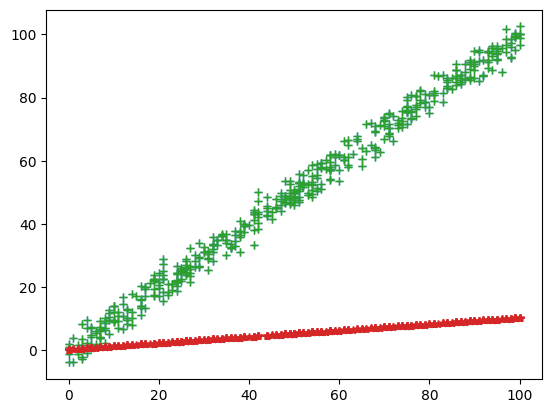

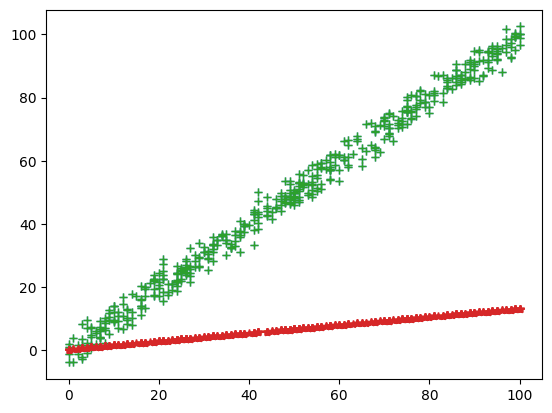

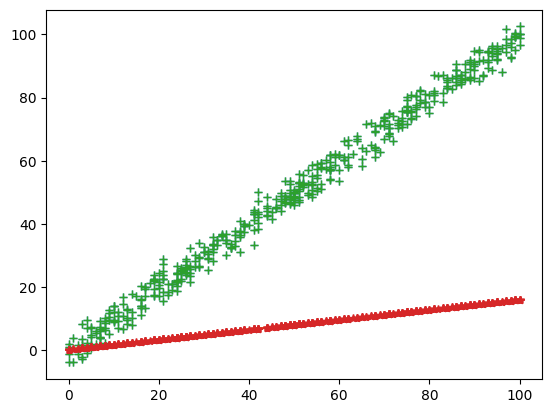

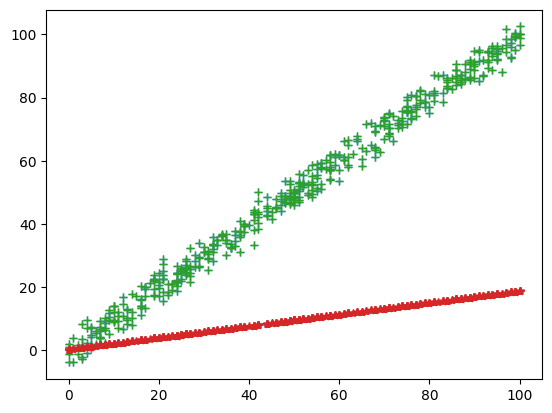

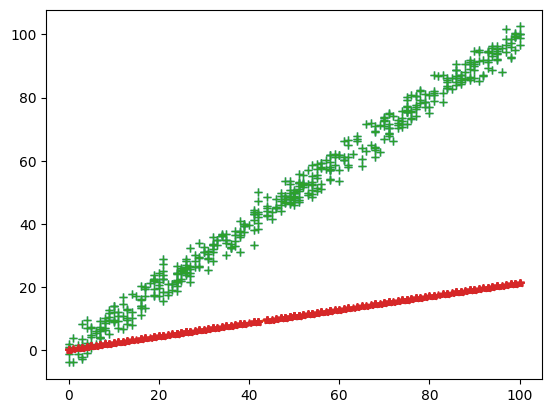

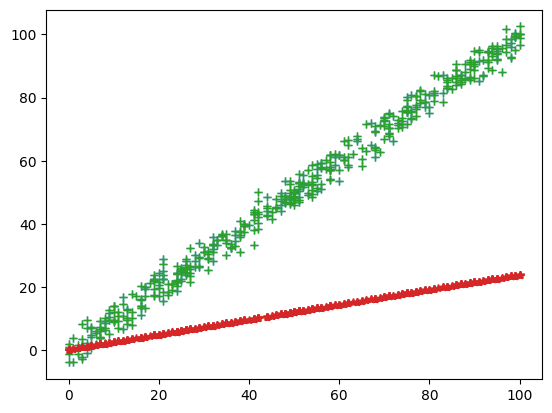

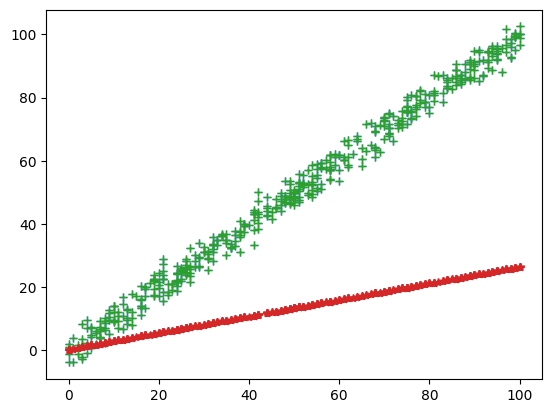

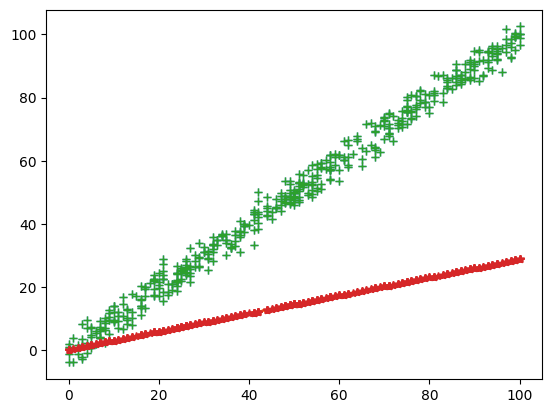

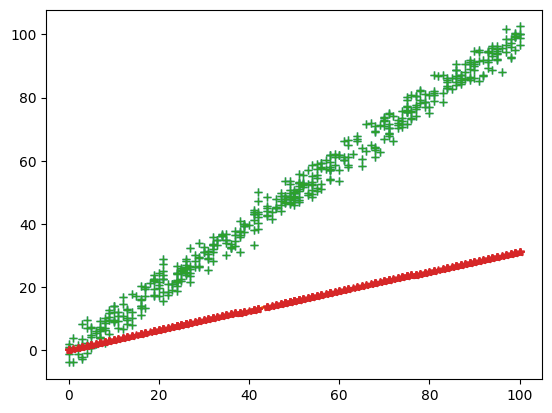

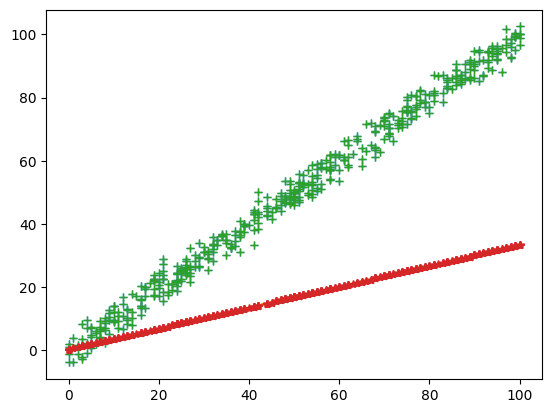

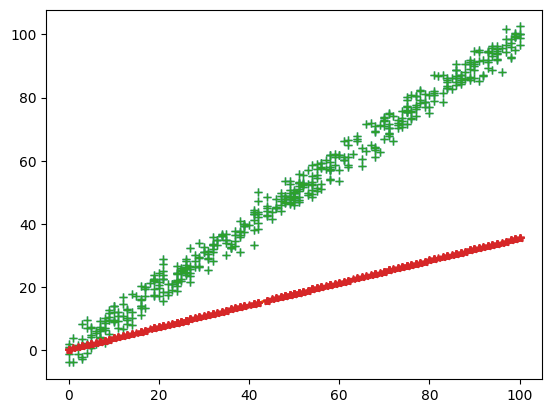

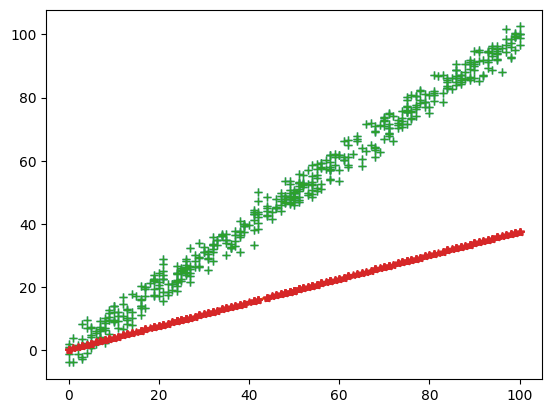

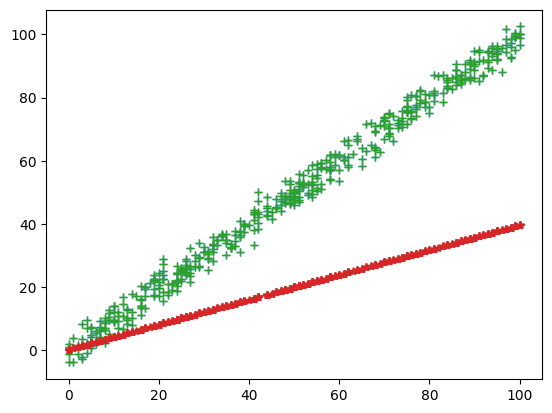

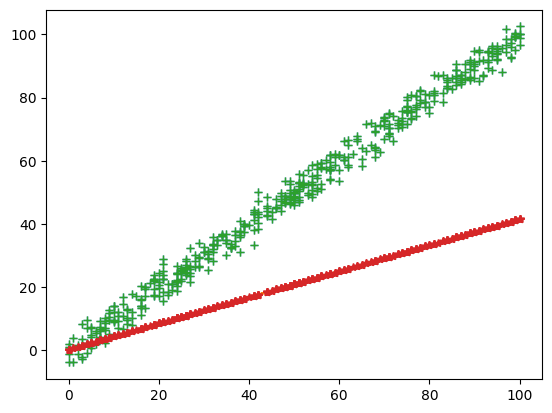

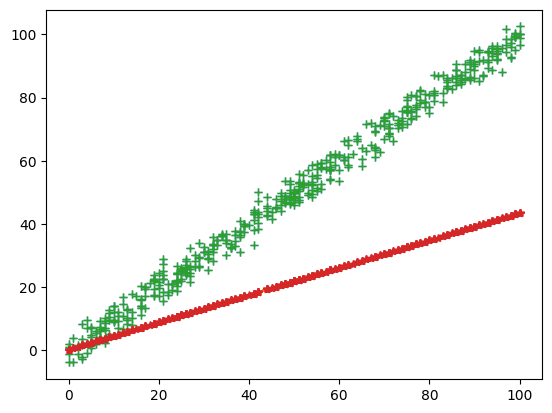

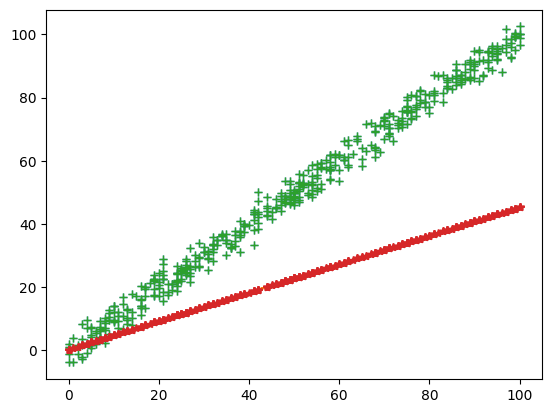

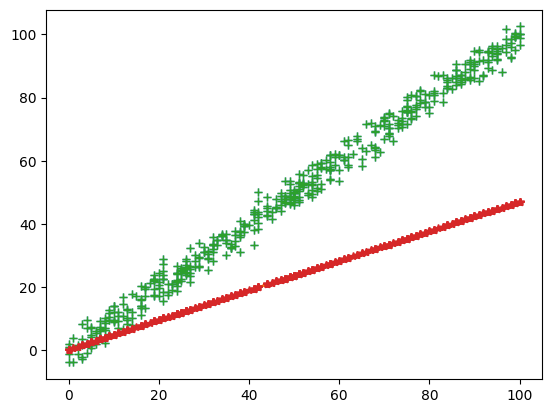

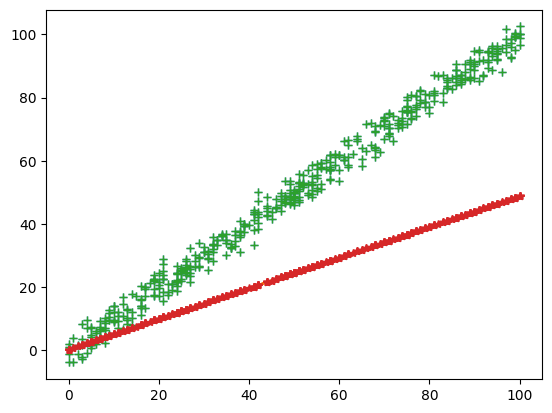

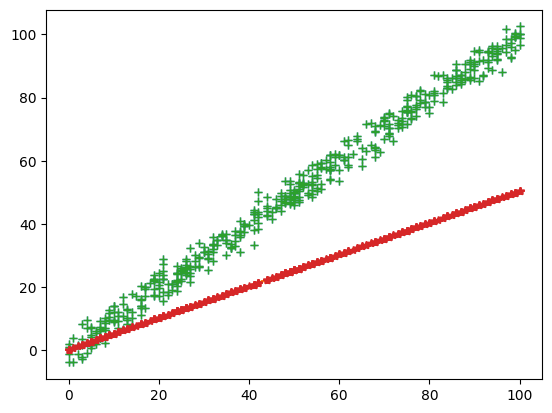

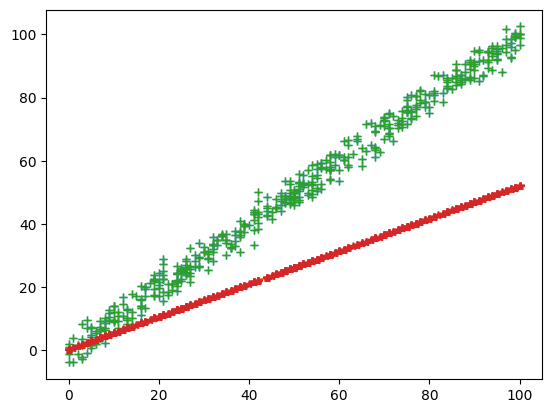

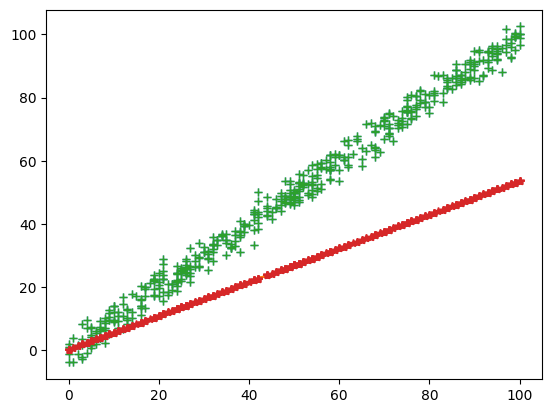

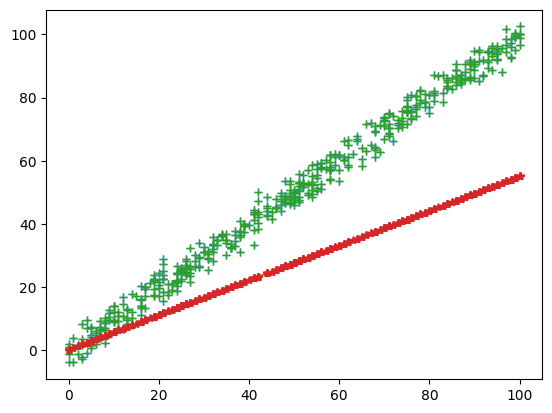

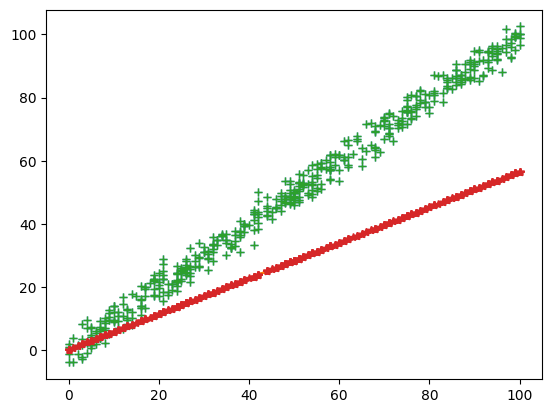

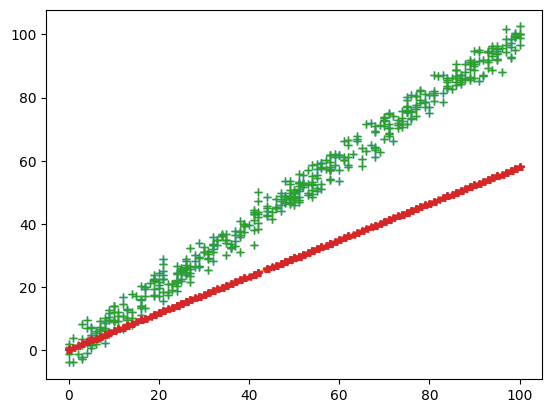

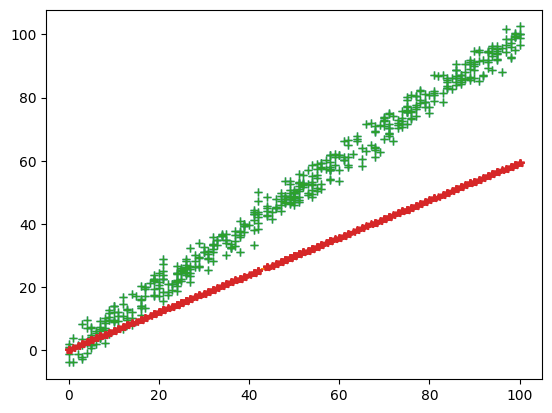

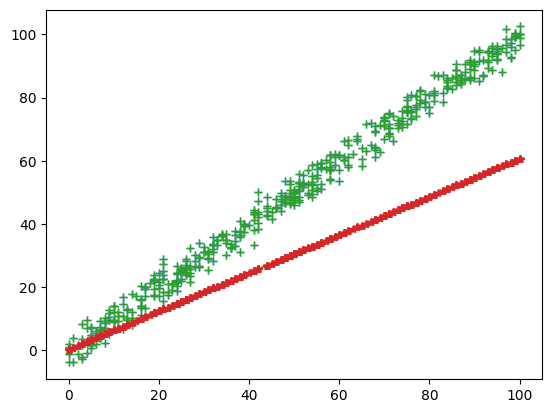

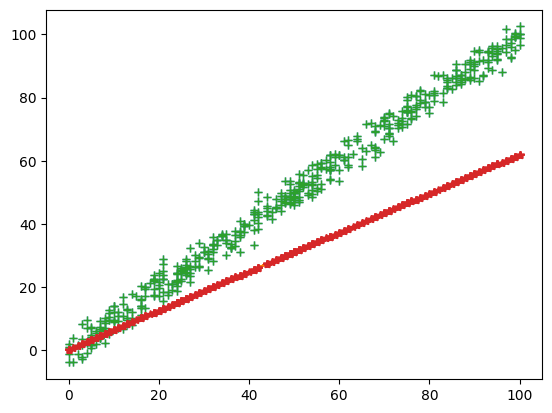

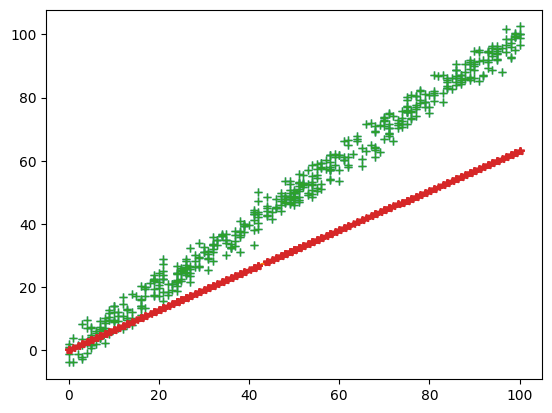

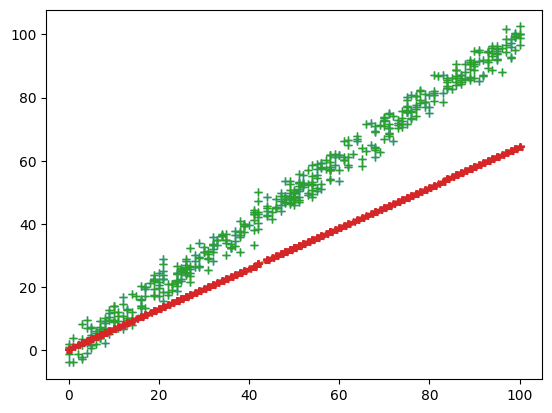

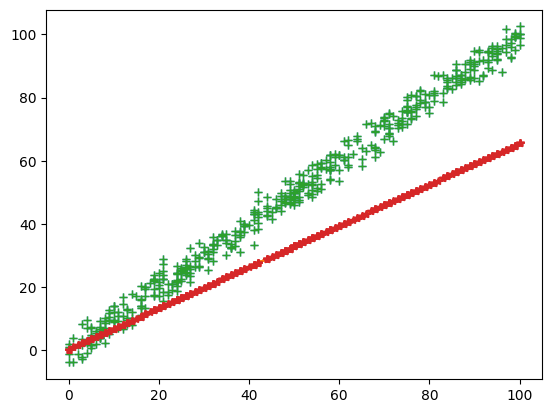

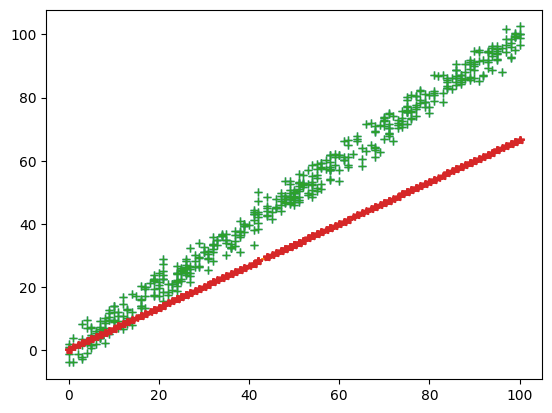

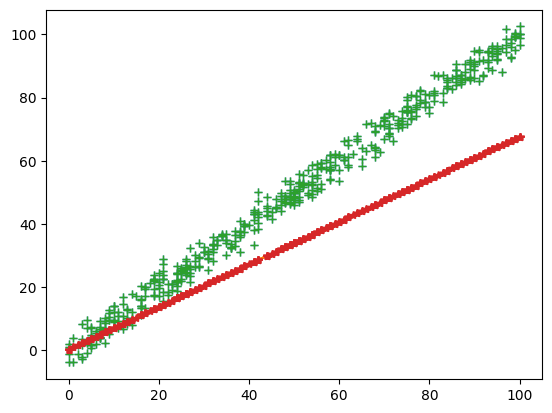

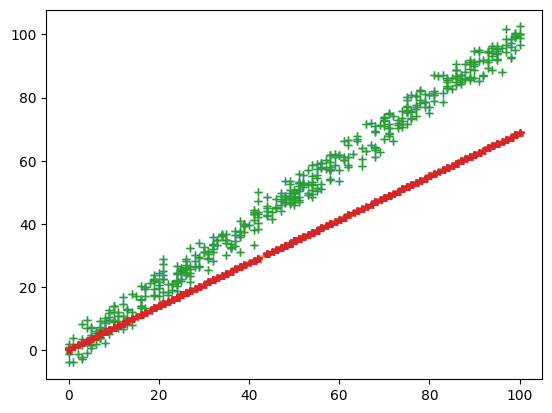

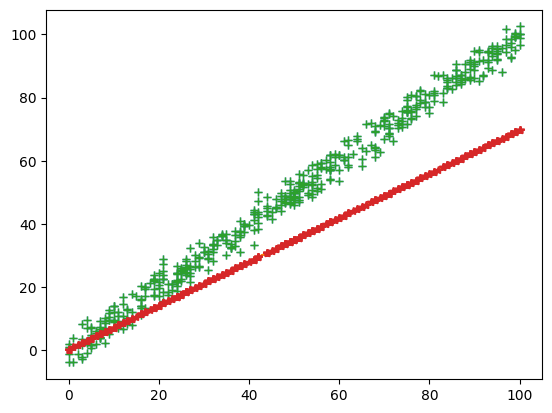

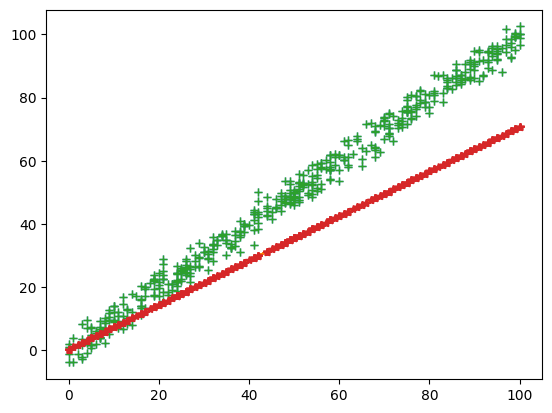

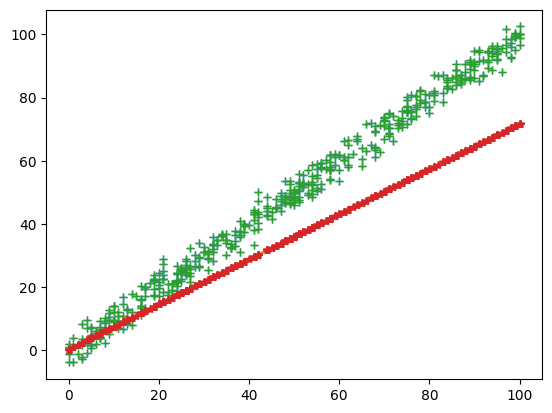

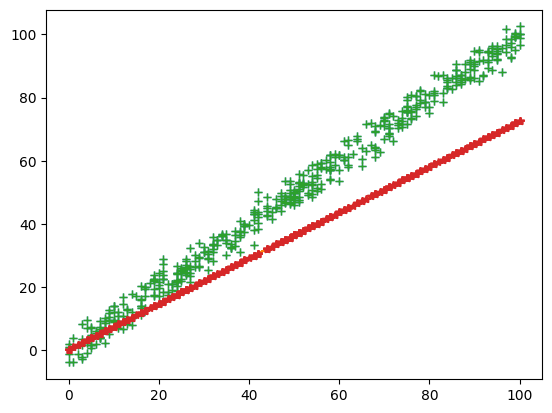

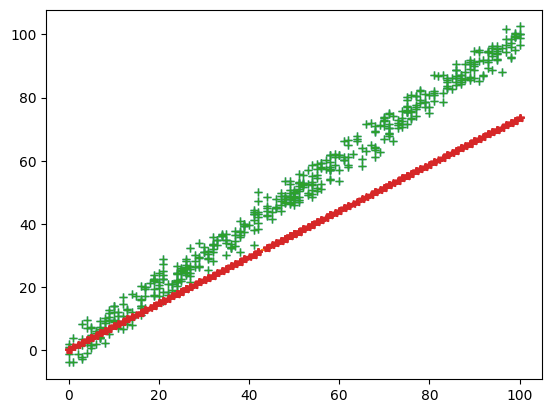

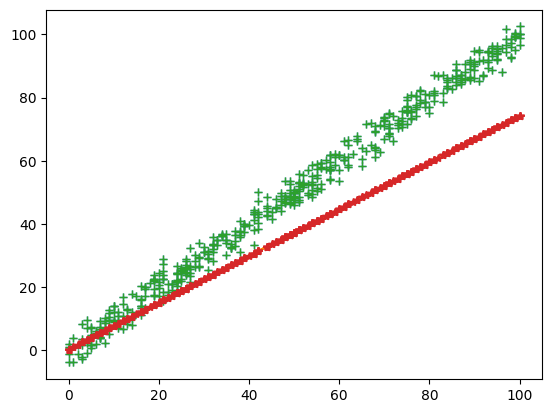

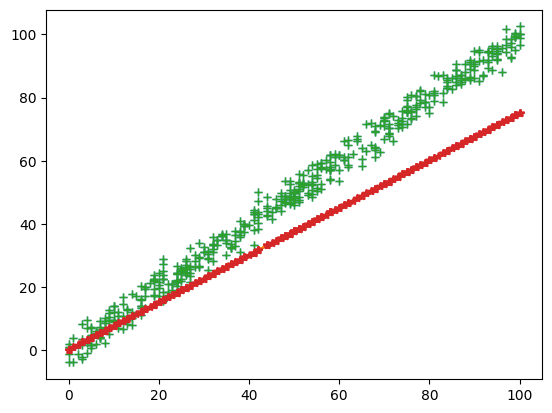

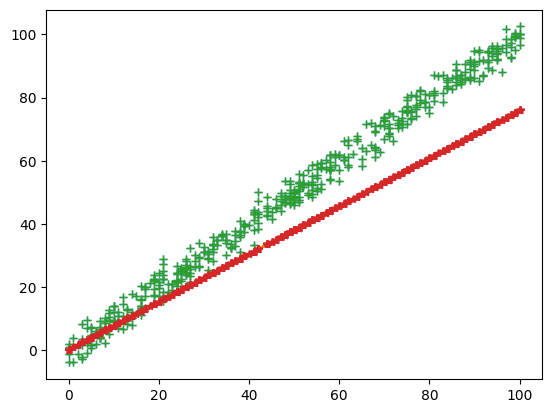

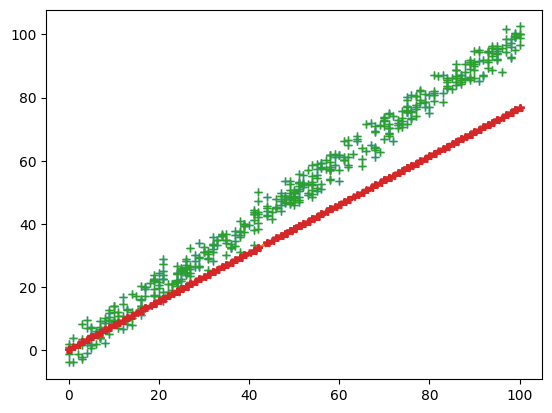

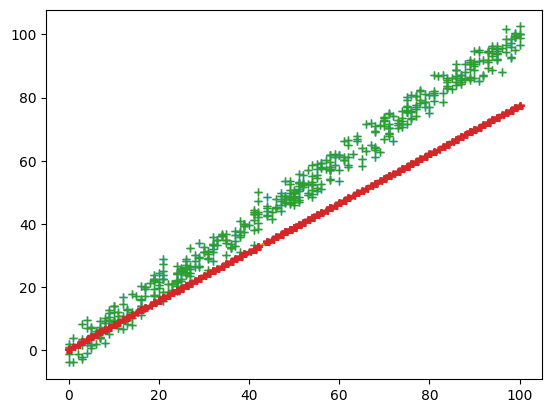

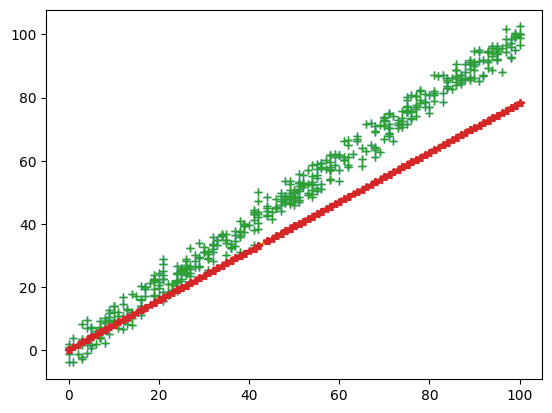

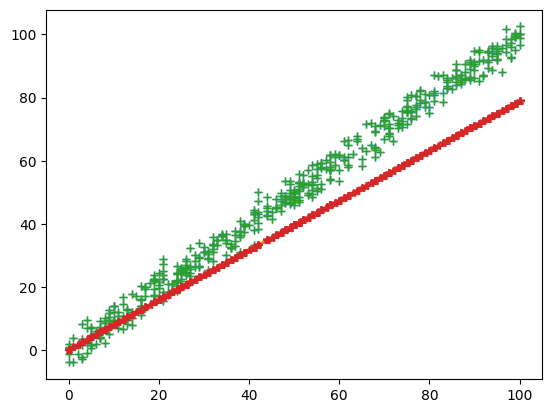

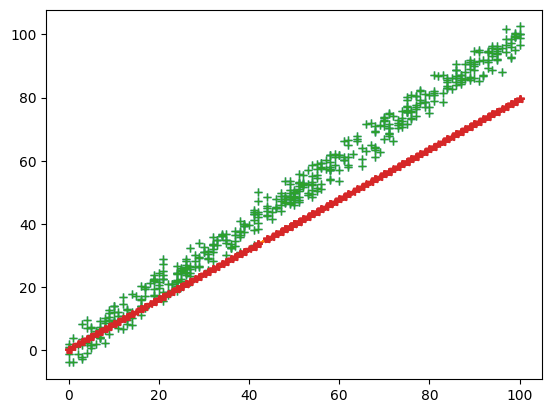

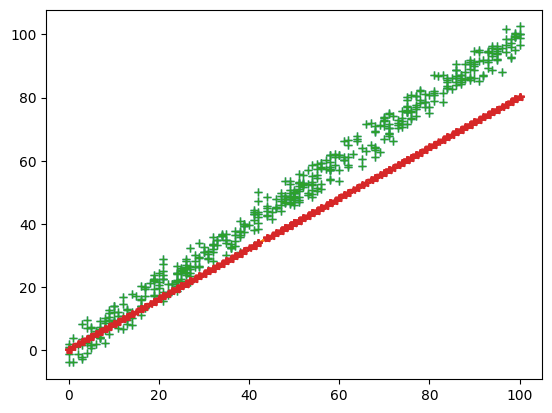

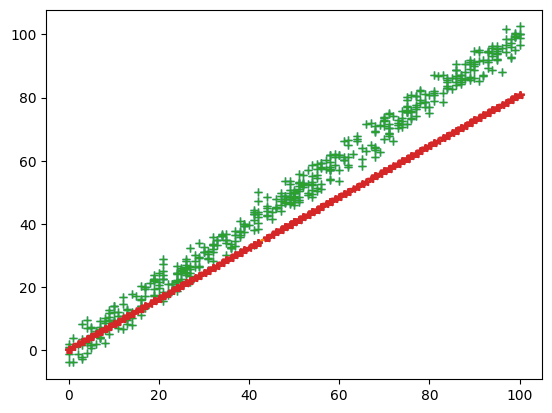

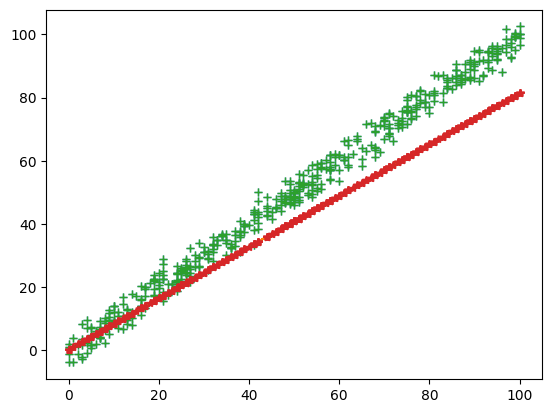

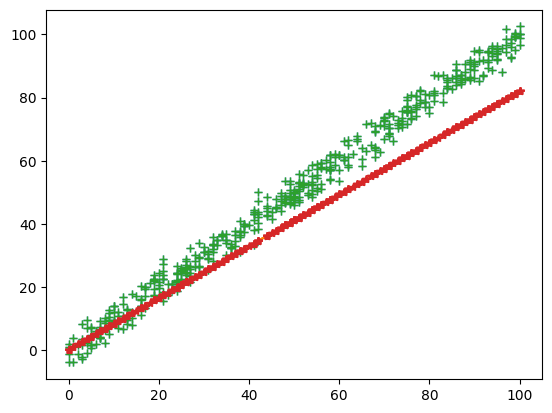

In [52]:
parameters , loss = train(train_input , train_output , 0.00001 , 50)